In [1]:
import xarray as xr
import os
import glob
import numpy as np
import warnings
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath('../src-double-gyre'))
sys.path.append(os.path.abspath('../src'))
warnings.filterwarnings("ignore")
from helpers.collection_of_experiments import CollectionOfExperiments
from plot_helpers import *

%load_ext autoreload
%autoreload 3

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [3]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/R4-sensitivity', additional_subfolder='output')

In [4]:
for RR in ['R4', 'R64', 'ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0']:
    ds.remesh(RR, 'R1')
    ds.remesh(RR, 'R2')
    if RR != 'R4':
        ds.remesh(RR, 'R4')

Experiment R4 coarsegrained to R1 is created. Its identificator=R4_R1
Experiment R4 coarsegrained to R2 is created. Its identificator=R4_R2
Experiment R64 coarsegrained to R1 is created. Its identificator=R64_R1
Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0 coarsegrained to R1 is created. Its identificator=ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0_R1
Experiment ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0 coarsegrained to R2 is created. Its identificator=ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0_R2
Experiment ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0 coarsegrained to R4 is created. Its identificator=ZB-stress-pass-4-sel-1-Cs-0.06-ZB-1.0_R4


# Check metrics function

In [9]:
import sys
sys.path.append('../scripts')
from loss_DG import variability_metrics

In [10]:
R4 = variability_metrics(ds['R4'].e, ds['R4'].u, ds['R4'].v, ds['R4'].param, coarse_factor=8, compute_e=True)

In [11]:
R64 = variability_metrics(ds['R64_R4'].e, ds['R64_R4'].u, ds['R64_R4'].v, ds['R64_R4'].param, coarse_factor=8, compute_e=True)

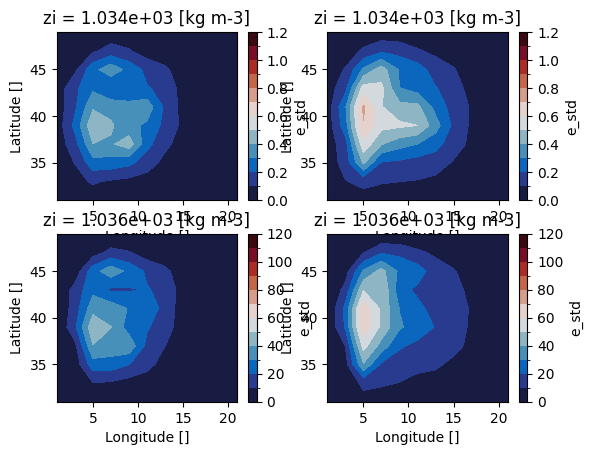

In [12]:
plt.subplot(2,2,1)
R4['e_std'][0].plot.contourf(levels=np.arange(0,1.3,0.1), cmap=cmocean.cm.balance)

plt.subplot(2,2,2)
R64['e_std'][0].plot.contourf(levels=np.arange(0,1.3,0.1), cmap=cmocean.cm.balance)

plt.subplot(2,2,3)
R4['e_std'][1].plot.contourf(levels=np.arange(0,130,10), cmap=cmocean.cm.balance)

plt.subplot(2,2,4)
R64['e_std'][1].plot.contourf(levels=np.arange(0,130,10), cmap=cmocean.cm.balance)

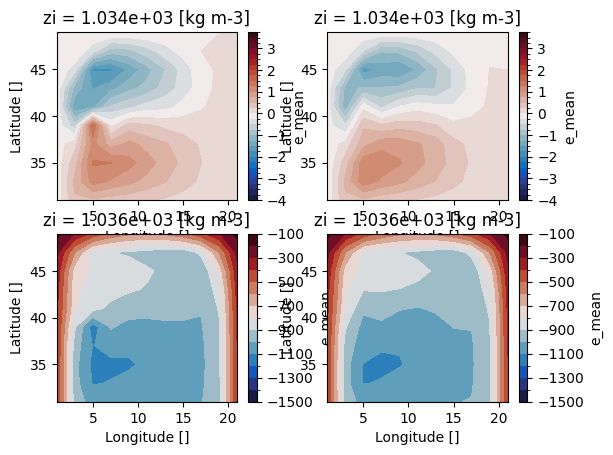

In [15]:
plt.subplot(2,2,1)
R4['e_mean'][0].plot.contourf(levels=np.arange(-4,4,0.25), cmap=cmocean.cm.balance)

plt.subplot(2,2,2)
R64['e_mean'][0].plot.contourf(levels=np.arange(-4,4,0.25), cmap=cmocean.cm.balance)

plt.subplot(2,2,3)
R4['e_mean'][1].plot.contourf(levels=np.arange(-1500,0,100), cmap=cmocean.cm.balance)

plt.subplot(2,2,4)
R64['e_mean'][1].plot.contourf(levels=np.arange(-1500,0,100), cmap=cmocean.cm.balance)

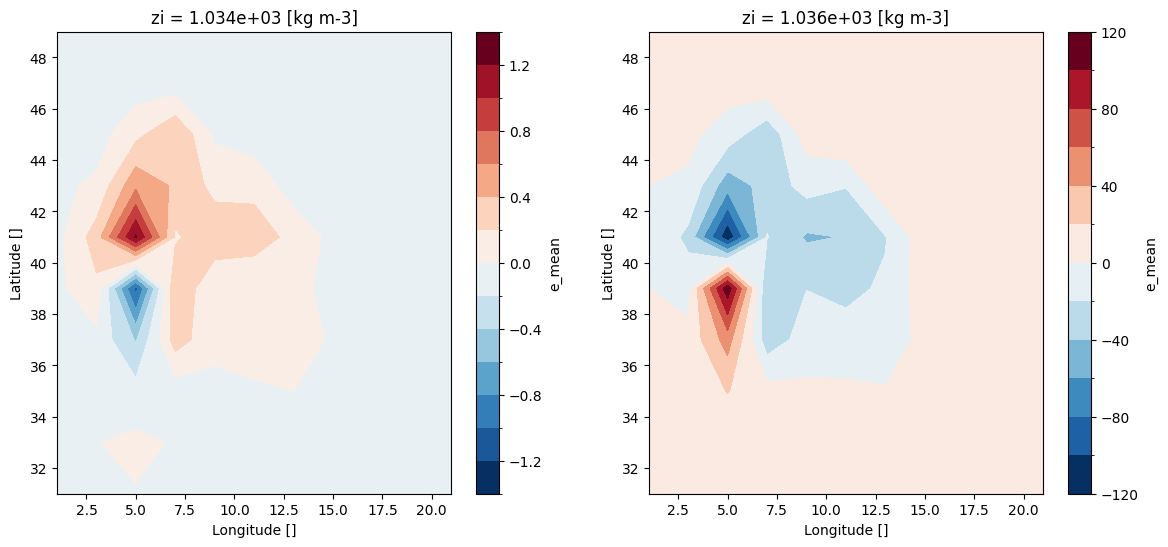

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(R64['e_mean'] - R4['e_mean'])[0].plot.contourf(levels=15)

plt.subplot(1,2,2)
(R64['e_mean'] - R4['e_mean'])[1].plot.contourf(levels=15)

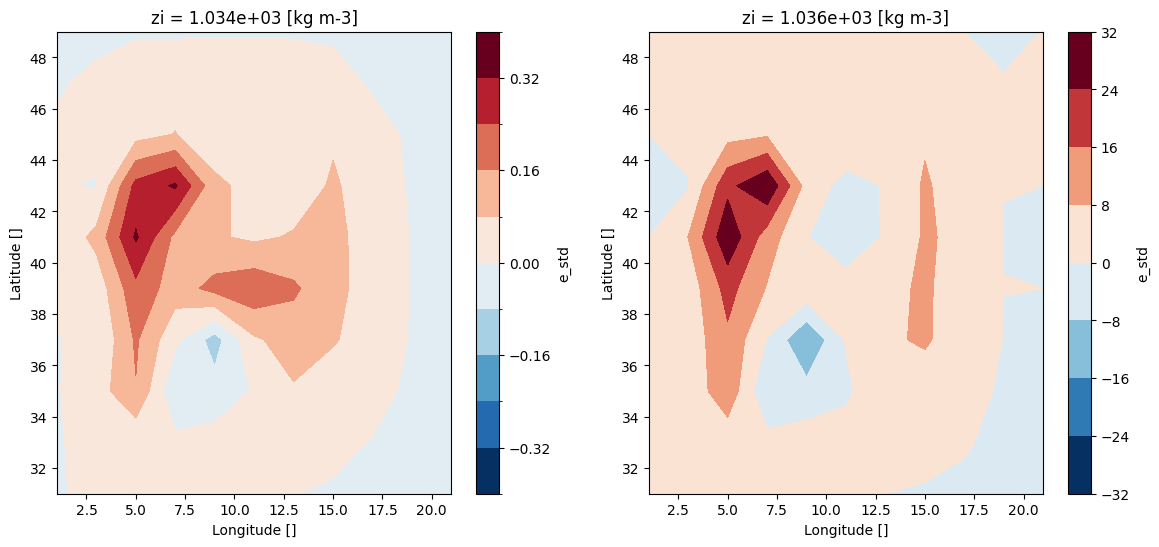

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
(R64['e_std'] - R4['e_std'])[0].plot.contourf(levels=10)

plt.subplot(1,2,2)
(R64['e_std'] - R4['e_std'])[1].plot.contourf(levels=10)

In [21]:
d = (R64['e_mean'] - R4['e_mean'])
xr.corr(d[0], d[1])

<xarray.DataArray 'e_mean' ()> Size: 4B
array(-0.9720252, dtype=float32)

In [25]:
d = (R64['e_std'] - R4['e_std'])
xr.corr(d[0], d[1])

<xarray.DataArray 'e_std' ()> Size: 4B
array(0.8961683, dtype=float32)

# Observation error

In [7]:
R64_0 = variability_metrics(ds['R64_R4'].e, ds['R64_R4'].u, ds['R64_R4'].v, ds['R64_R4'].param, Time=slice(1825,3650), coarse_factor=8, compute_e=True)
R64_1 = variability_metrics(ds['R64_R4'].e, ds['R64_R4'].u, ds['R64_R4'].v, ds['R64_R4'].param, Time=slice(3650,5475), coarse_factor=8, compute_e=True)
R64_2 = variability_metrics(ds['R64_R4'].e, ds['R64_R4'].u, ds['R64_R4'].v, ds['R64_R4'].param, Time=slice(5475,7300), coarse_factor=8, compute_e=True)

In [8]:
e_std_var = xr.concat([R64_0['e_std'], R64_1['e_std'], R64_2['e_std']], dim='segment').var('segment')
e_mean_var = xr.concat([R64_0['e_mean'], R64_1['e_mean'], R64_2['e_mean']], dim='segment').var('segment')
EKE_spectrum_var = xr.concat([R64_0['EKE_spectrum'],R64_1['EKE_spectrum'], R64_2['EKE_spectrum']], dim='segment').var('segment')

In [13]:
R64_dataset = xr.Dataset()
R64_dataset['e_std'] = R64_0['e_std']
R64_dataset['EKE_spectrum'] = R64_0['EKE_spectrum']
R64_dataset['e_mean'] = R64_0['e_mean']
R64_dataset['e_std_var'] = e_std_var
R64_dataset['e_mean_var'] = e_mean_var
R64_dataset['EKE_spectrum_var'] = EKE_spectrum_var

R64_dataset['e_std_var_ave'] = e_std_var*0 + e_std_var.mean(['xh', 'yh'])
R64_dataset['e_mean_var_ave'] = e_mean_var*0 + e_mean_var.mean(['xh', 'yh'])
R64_dataset['EKE_spectrum_var_ave'] = EKE_spectrum_var*0 + EKE_spectrum_var.mean(['freq_r'])

In [14]:
R64_dataset.astype('float32').to_netcdf('../scripts/R64_R4/full.nc')

# Check calibration results

In [273]:
import xarray as xr
 
path_hires = '../scripts/R64_R4/full.nc'
hires = xr.open_dataset(path_hires)

# This number represents how many elements in the observational vector
# In our case, it is 2 metrics x 2 layers x 10 lats x 11 lons = 440
obs_length = 440

'''
Here, gamma_mean and gamma_std are variances for the two fields
using in EKI during training
'''
gamma_mean = 2 * hires['e_mean_var_ave']
gamma_std  = 2 * hires['e_std_var_ave']
e_mean_true = hires['e_mean']
e_std_true = hires['e_std']


def MSE_weighted(e_mean, e_std):
    out =  ((e_mean - e_mean_true)**2 / gamma_mean + \
            (e_std  - e_std_true )**2 / gamma_std).sum(['xh', 'yh', 'zi']) / obs_length
    return xr.where(out > 0, out, np.nan)
    return out

def read_metrics(path_metrics = '/scratch/pp2681/mom6/CM26_Double_Gyre/calibration/variability-R4/EKI-Vanilla-e-mean-std-spread-0.1/metrics.nc'):

    metrics = xr.open_dataset(path_metrics)
    WMSE = MSE_weighted(metrics['e_mean'], metrics['e_std'])
    
    # EKI converges to a point of maximum posterior. Best estimation of forward map in that point is given as an ensemble mean
    WMSE_MAP = MSE_weighted(metrics['e_mean'].mean('ens'), metrics['e_std'].mean('ens'))

    # Noise level is crudely estimated from the spread of the final ensemble. We assume that the ensemble collapsed
    # We additionally multiply that variance by two to account for forward model and observation model errors
    noise_level = 2 * (metrics['e_mean'].isel(iter=-1).var('ens') / gamma_mean + \
                       metrics['e_std'].isel(iter=-1).var('ens') / gamma_std).sum(['xh', 'yh', 'zi']) / obs_length

    return dict(WMSE = WMSE, WMSE_MAP = WMSE_MAP, noise_level=noise_level)

In [274]:
metrics = read_metrics()

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [3]:
ds +=  CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/CM26_Double_Gyre/calibration', additional_subfolder='output')

In [4]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/CM26_Double_Gyre/generalization', additional_subfolder='output')

In [5]:
ds.remesh('R64', 'R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


In [263]:
import sys
sys.path.append('../scripts')
from loss_DG import *
prog = ds['May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06'].prog
static = ds['R4'].param
ANN_offline = variability_metrics(prog.e, prog.u, prog.v, static, compute_e = True, coarse_factor=8)
prog = ds['R4'].prog
control = variability_metrics(prog.e, prog.u, prog.v, static, compute_e = True, coarse_factor=8)

In [265]:
WMSE_control = MSE_weighted(control.e_mean, control.e_std)
WMSE_offline = MSE_weighted(ANN_offline.e_mean, ANN_offline.e_std)

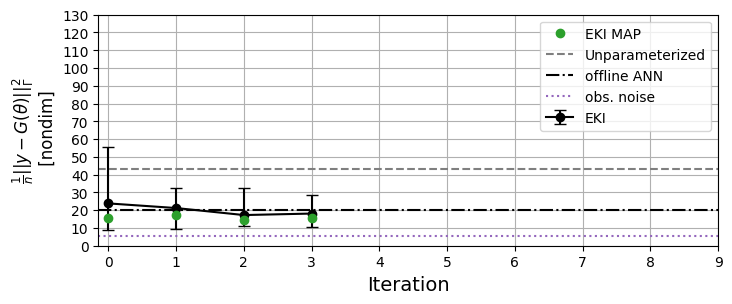

In [298]:
plt.figure(figsize=(8,3))

ymin = metrics['WMSE'].min('ens')
ymax = metrics['WMSE'].max('ens')
ymid = metrics['WMSE'].mean('ens')

yerr = np.vstack([ymid - ymin, ymax - ymid])
plt.errorbar(np.arange(4), ymid, yerr=yerr, fmt='o', capsize=4, color='k', label='EKI', ls='-')
plt.plot(np.arange(4), metrics['WMSE_MAP'], color='tab:green', label='EKI MAP', ls='', marker='o', zorder=10)

plt.ylabel('$\\frac{1}{n}||y-G(\\theta)||_{\Gamma}^2$\n [nondim]', fontsize=12)

plt.axhline(y=WMSE_control, ls='--', label='Unparameterized', color='tab:gray')
plt.axhline(y=WMSE_offline, ls='-.', label='offline ANN', color='k')
plt.axhline(y=metrics['noise_level'], ls=':', label='obs. noise', color='tab:purple')

plt.xticks(np.arange(10));
plt.ylim([0,130])
plt.yticks(np.arange(0,140,10))
plt.xlabel('Iteration', fontsize=14)
plt.grid()
plt.legend(loc='upper right')

plt.savefig('EKI-R4-emean-estd.pdf', bbox_inches='tight')

In [301]:
np.abs(metrics['WMSE'] - metrics['WMSE'].mean('ens')).argmin('ens')

<xarray.DataArray (iter: 4)> Size: 32B
array([12, 94,  9, 59])
Dimensions without coordinates: iter

In [306]:
metrics['WMSE'].argmin('ens')

<xarray.DataArray (iter: 4)> Size: 32B
array([71, 66, 66, 89])
Dimensions without coordinates: iter

#### ds.plot_ssh(['R4', 
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-00', 
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-01',
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-02',
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-03',
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-04',
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-05',
             'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-03-ens-member-06',
             'R64_R4'])

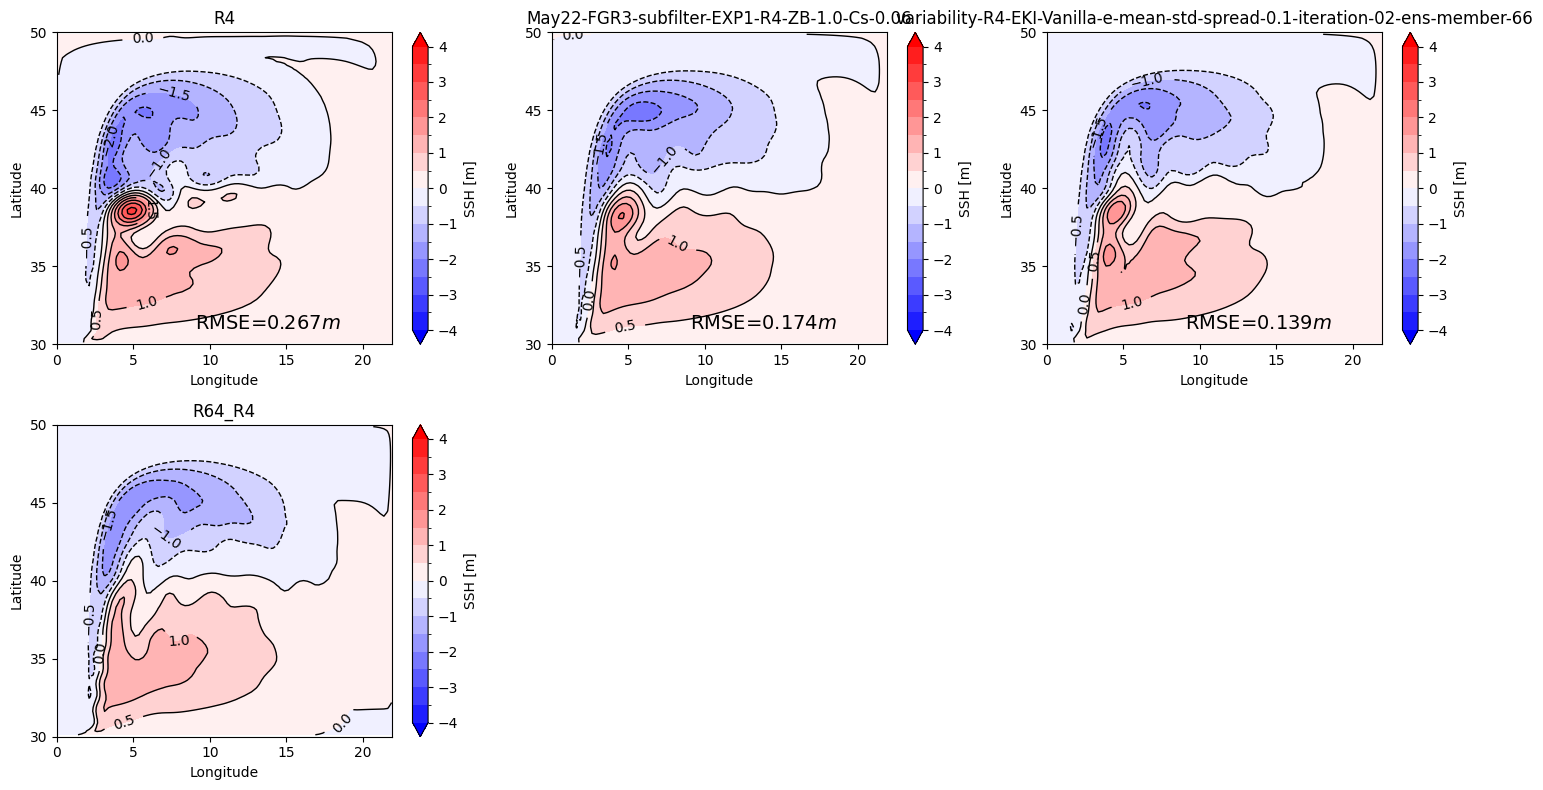

In [314]:
ds.plot_ssh(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-02-ens-member-66', 'R64_R4'])

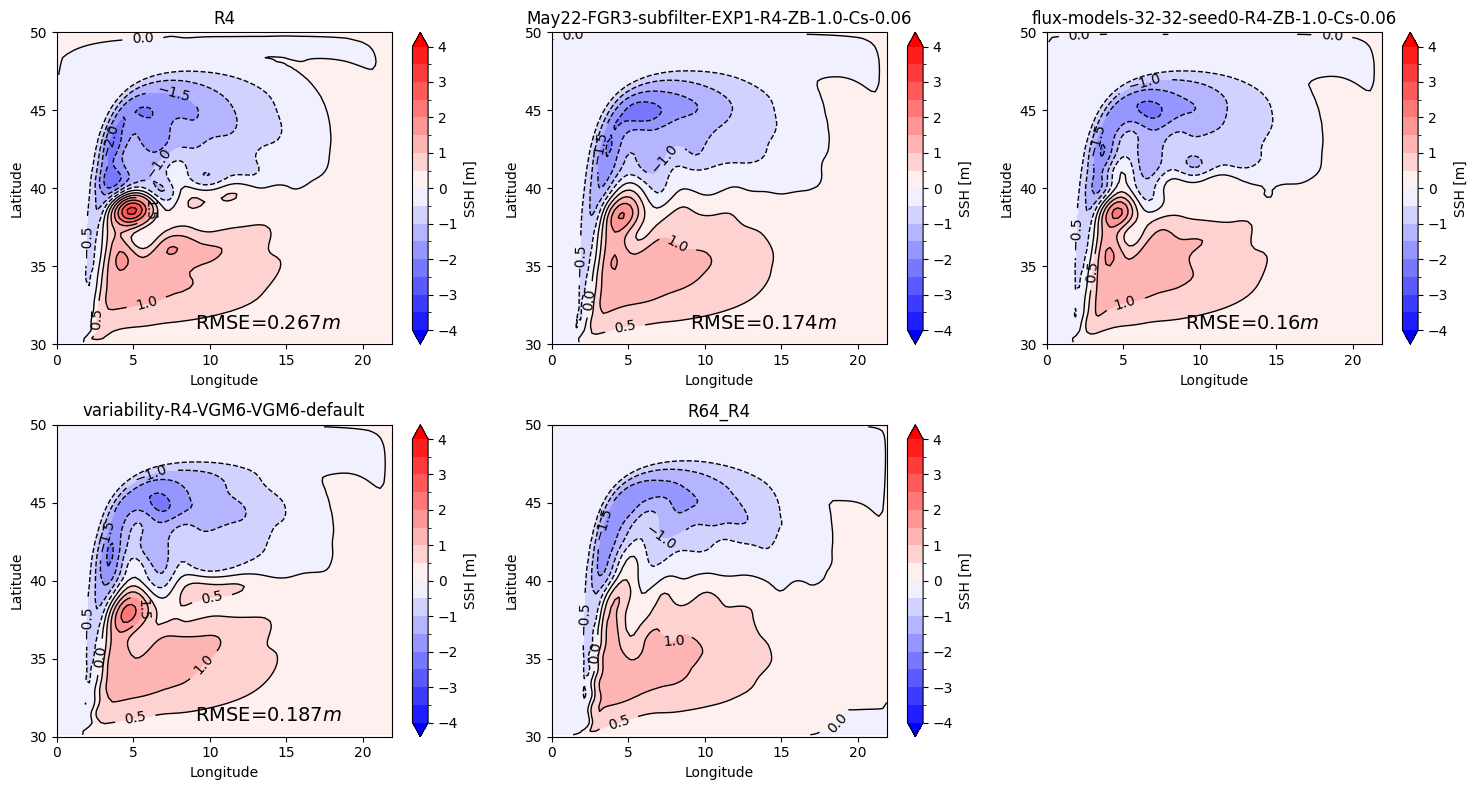

In [17]:
ds.plot_ssh(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'flux-models-32-32-seed0-R4-ZB-1.0-Cs-0.06', 'variability-R4-VGM6-VGM6-default', 'R64_R4'])

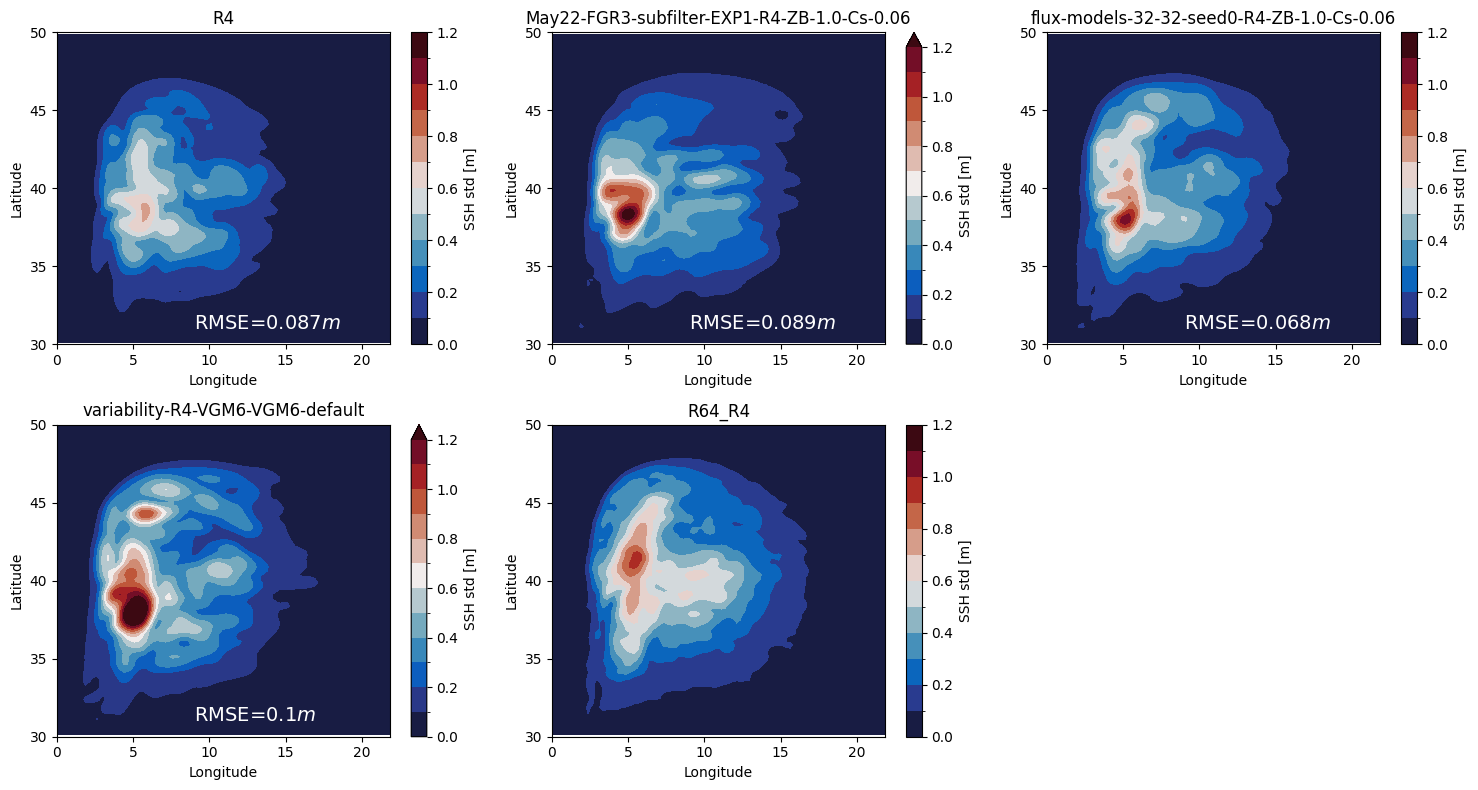

In [16]:
ds.plot_ssh_std(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'flux-models-32-32-seed0-R4-ZB-1.0-Cs-0.06', 'variability-R4-VGM6-VGM6-default', 'R64_R4'], target='R64_R4')

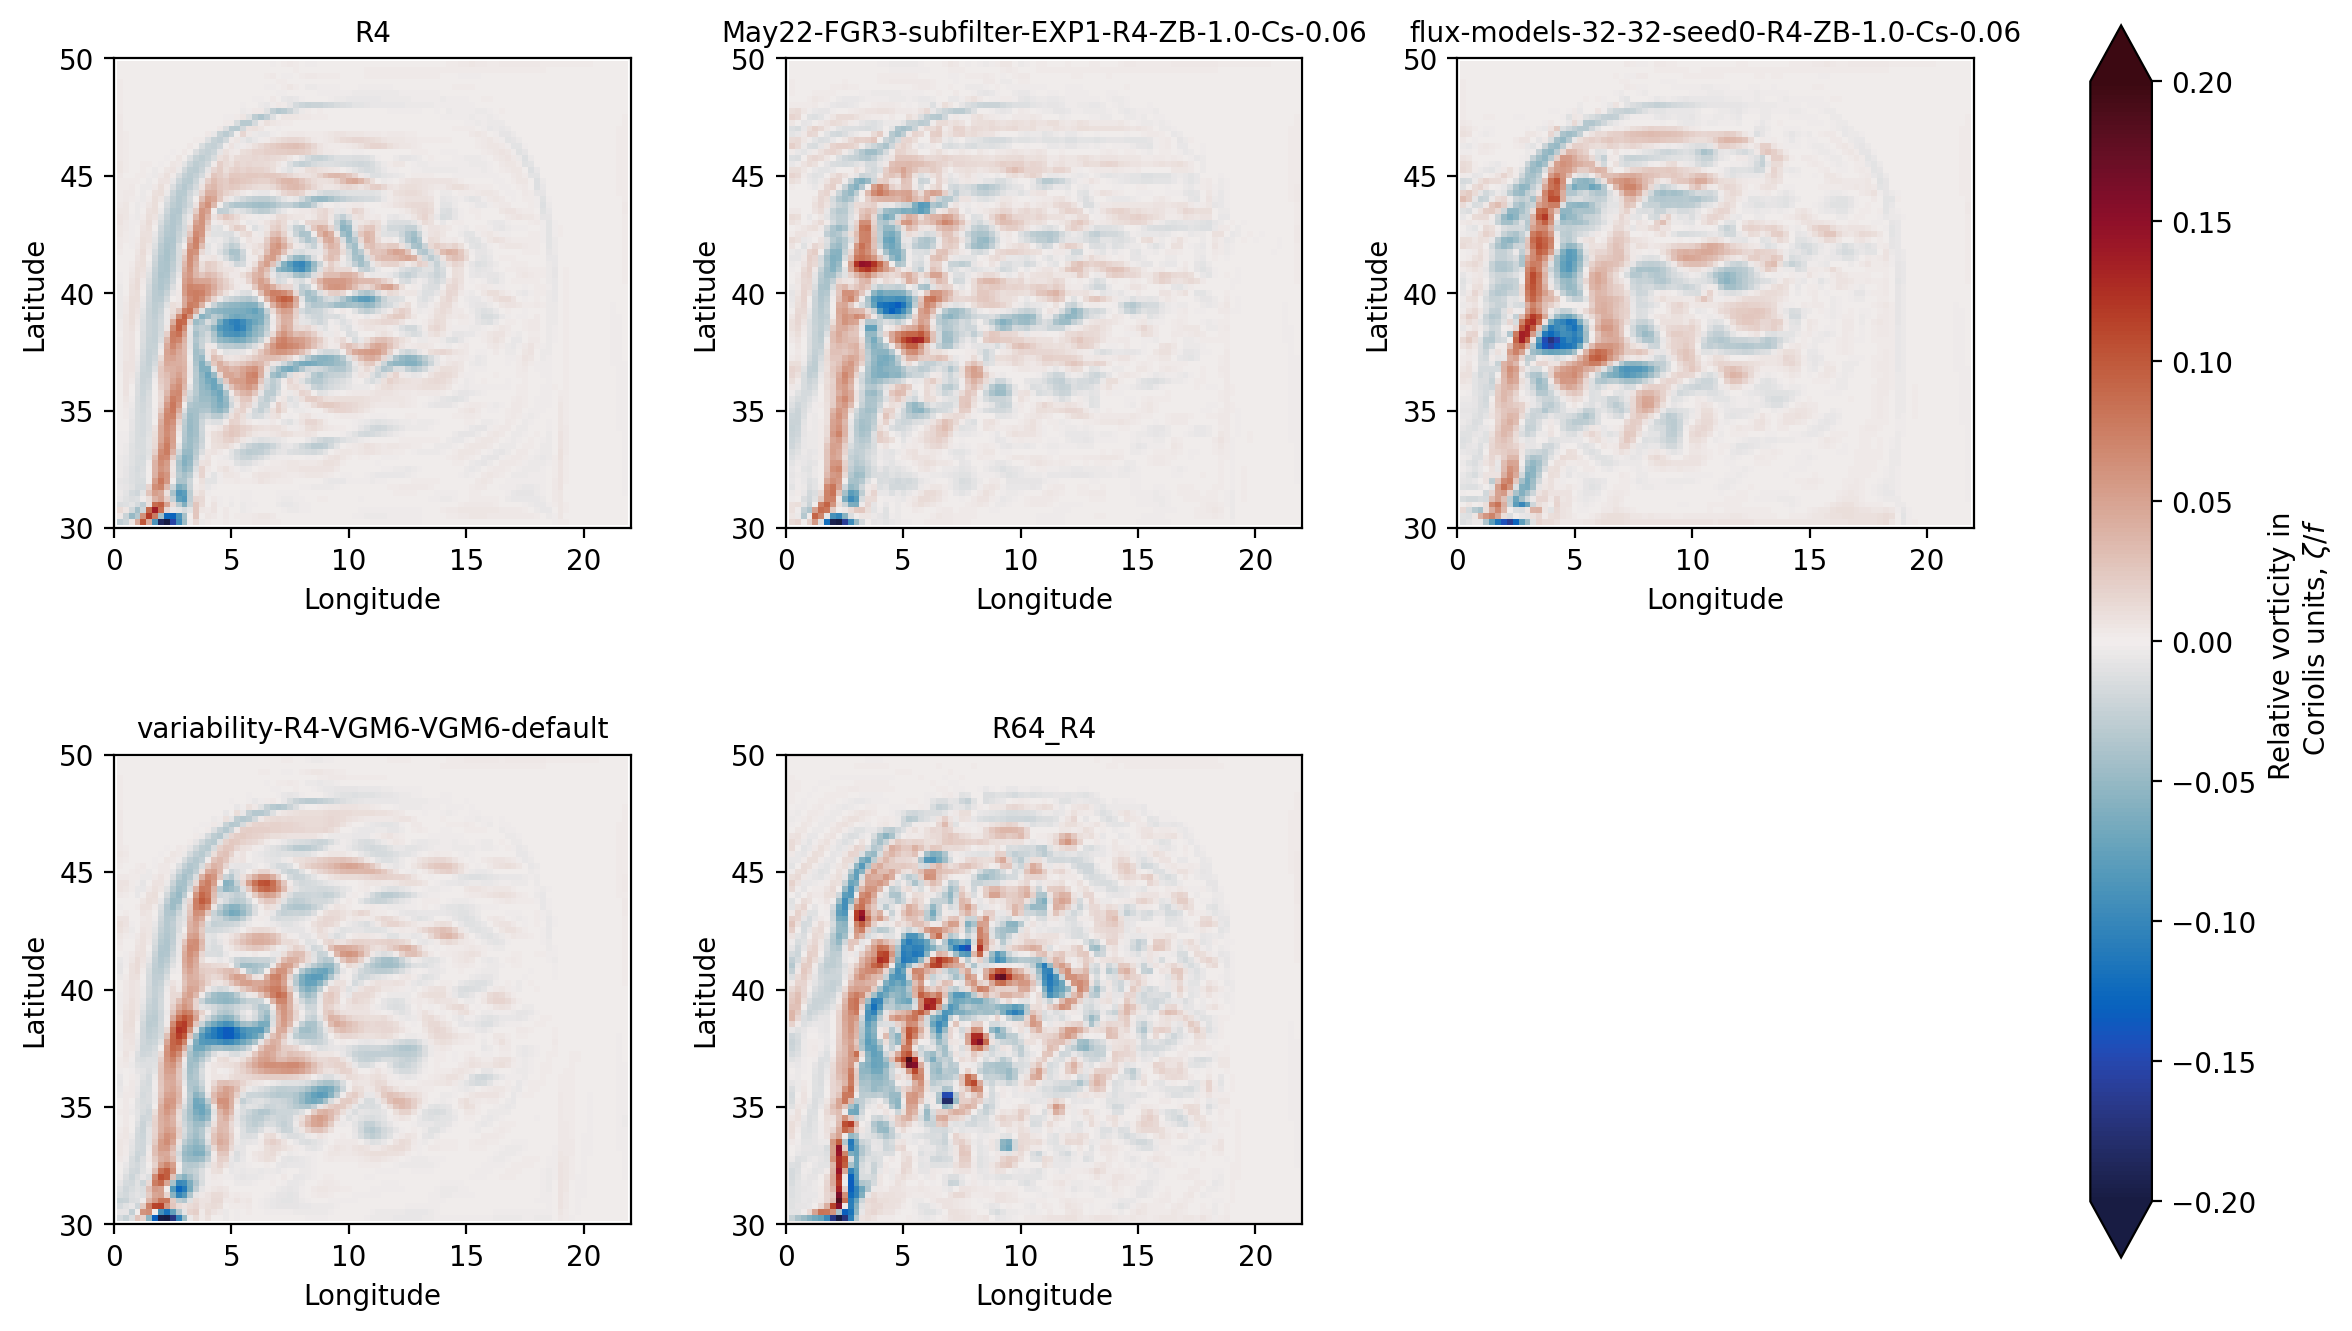

In [14]:
ds.plot_RV(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'flux-models-32-32-seed0-R4-ZB-1.0-Cs-0.06', 'variability-R4-VGM6-VGM6-default', 'R64_R4'])

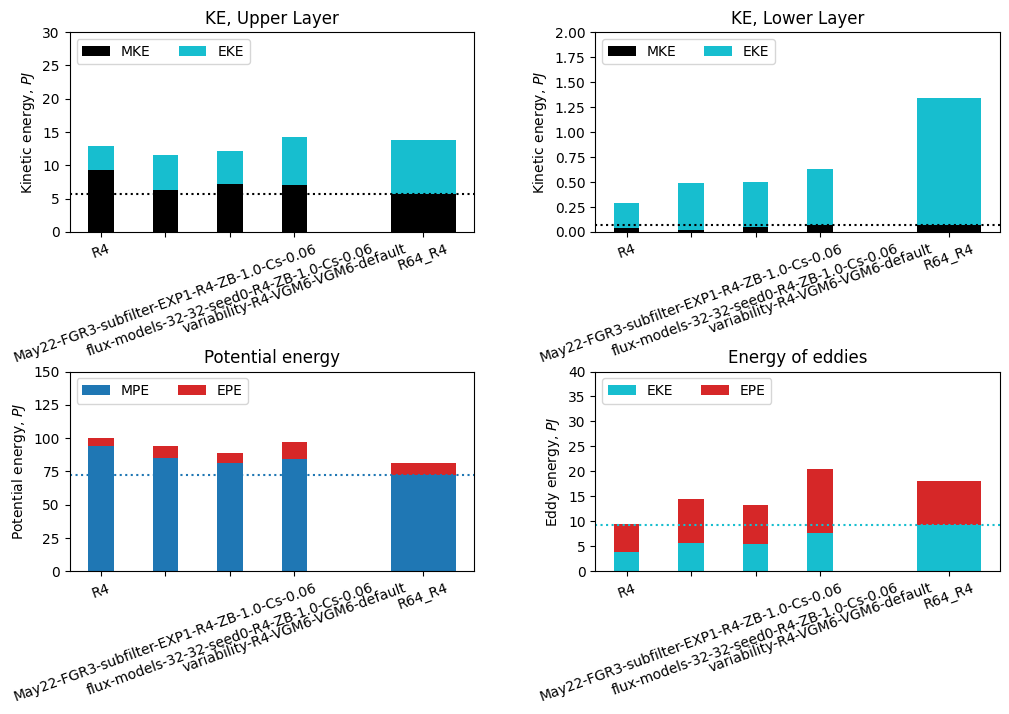

In [18]:
ds.plot_KE_PE(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'flux-models-32-32-seed0-R4-ZB-1.0-Cs-0.06', 'variability-R4-VGM6-VGM6-default', 'R64_R4'])

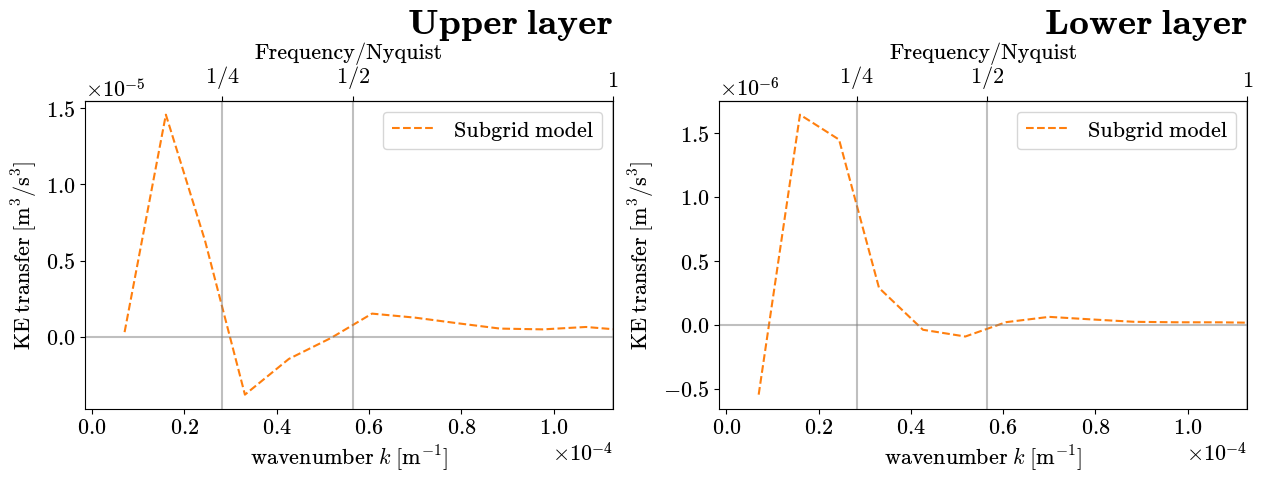

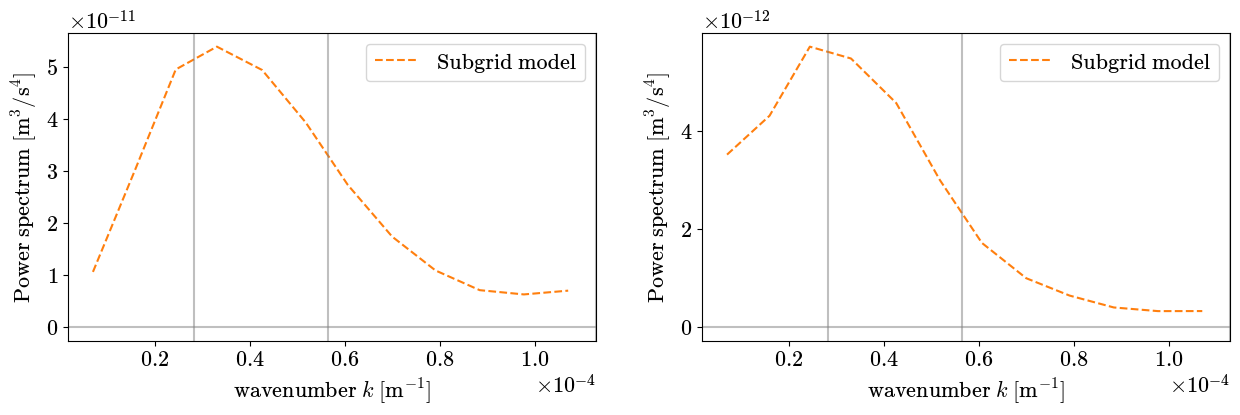

In [31]:
ds.plot_transfer('May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06')

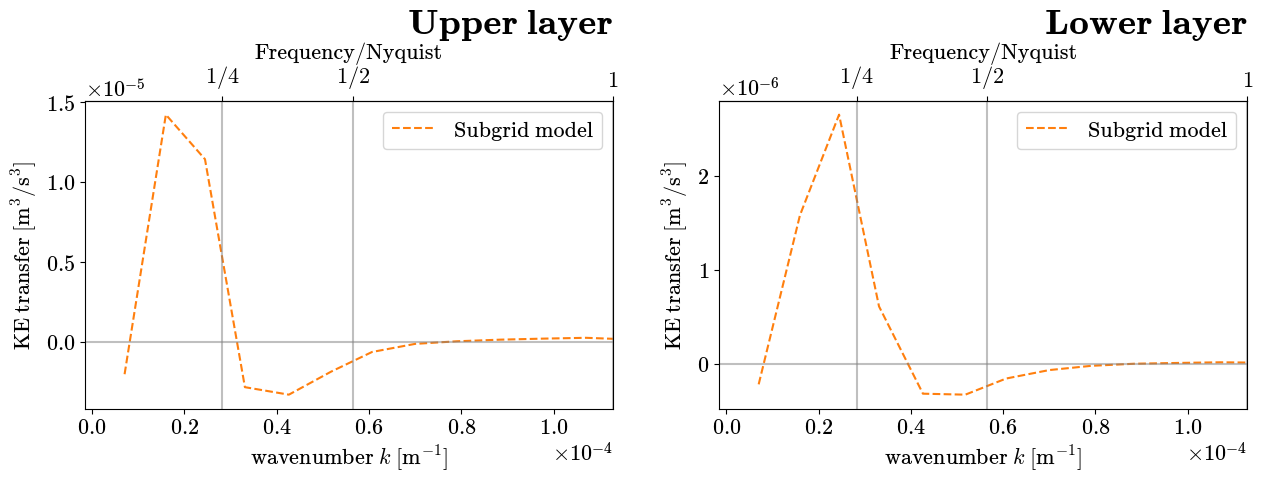

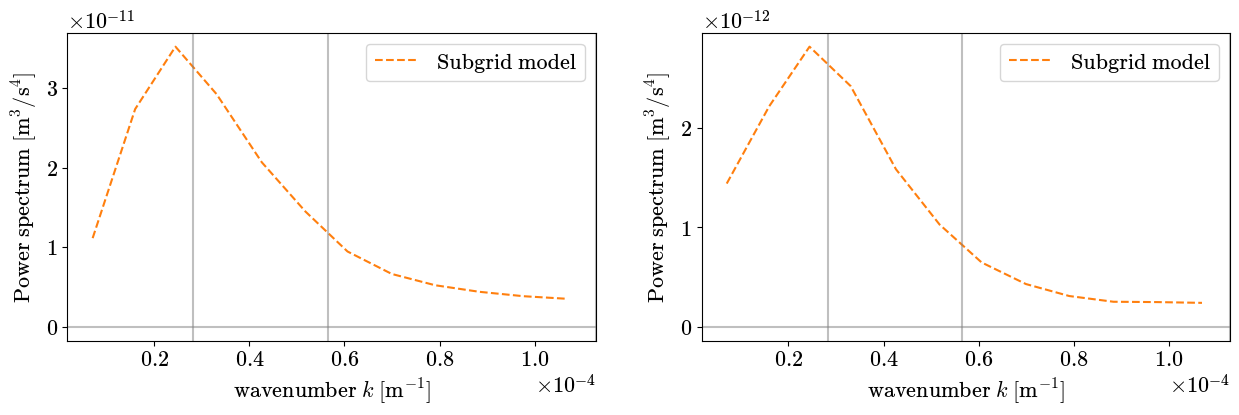

In [32]:
ds.plot_transfer('flux-models-32-32-seed0-R4-ZB-1.0-Cs-0.06')

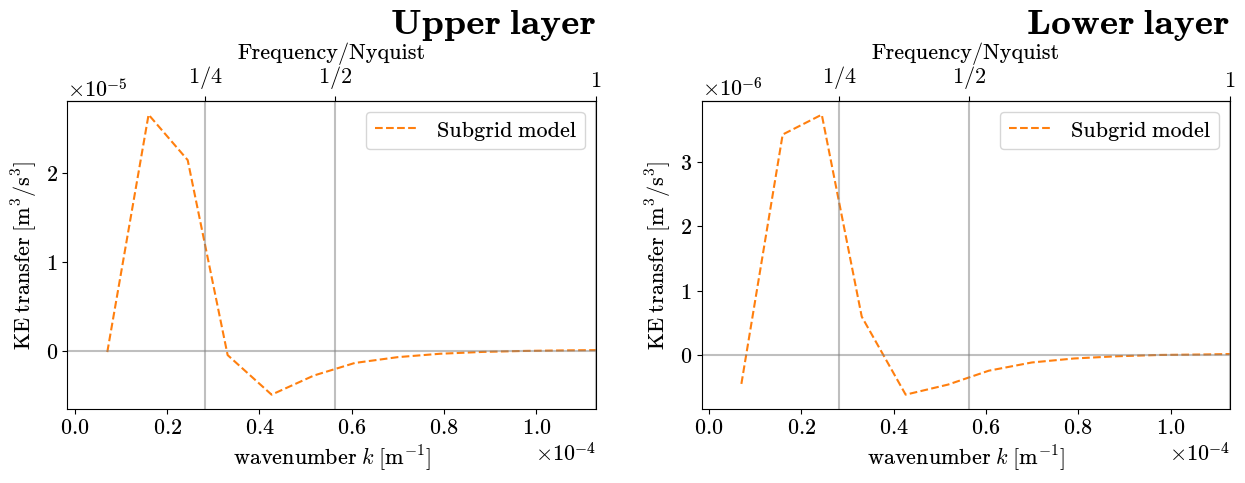

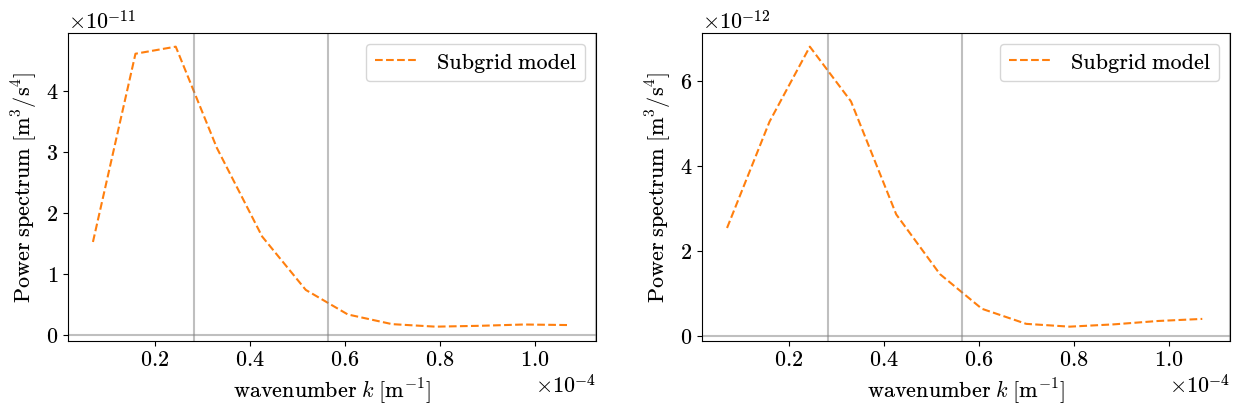

In [33]:
ds.plot_transfer('variability-R4-VGM6-VGM6-default')

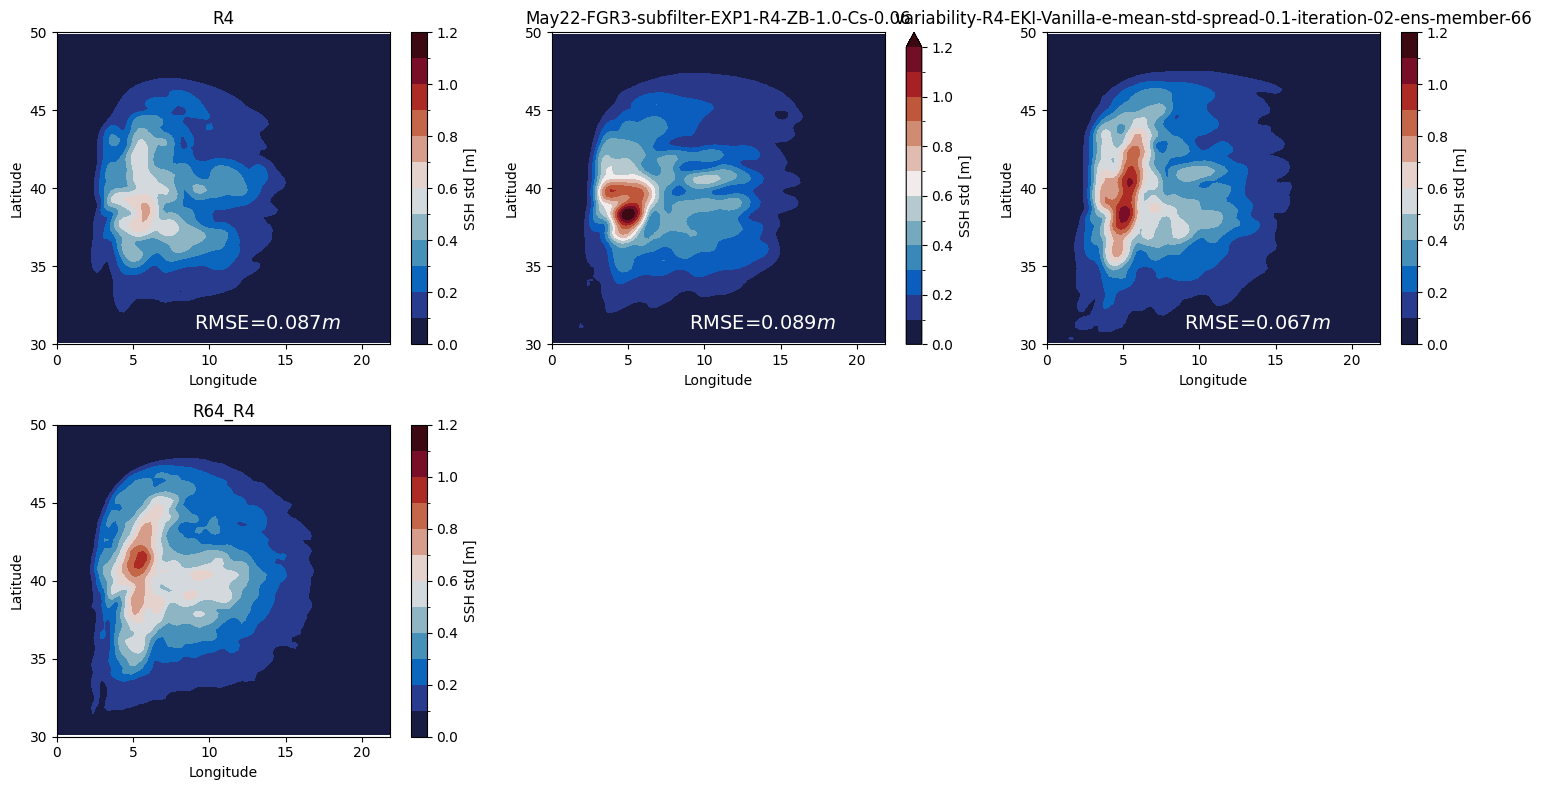

In [313]:
ds.plot_ssh_std(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-02-ens-member-66', 'R64_R4'], target='R64_R4')

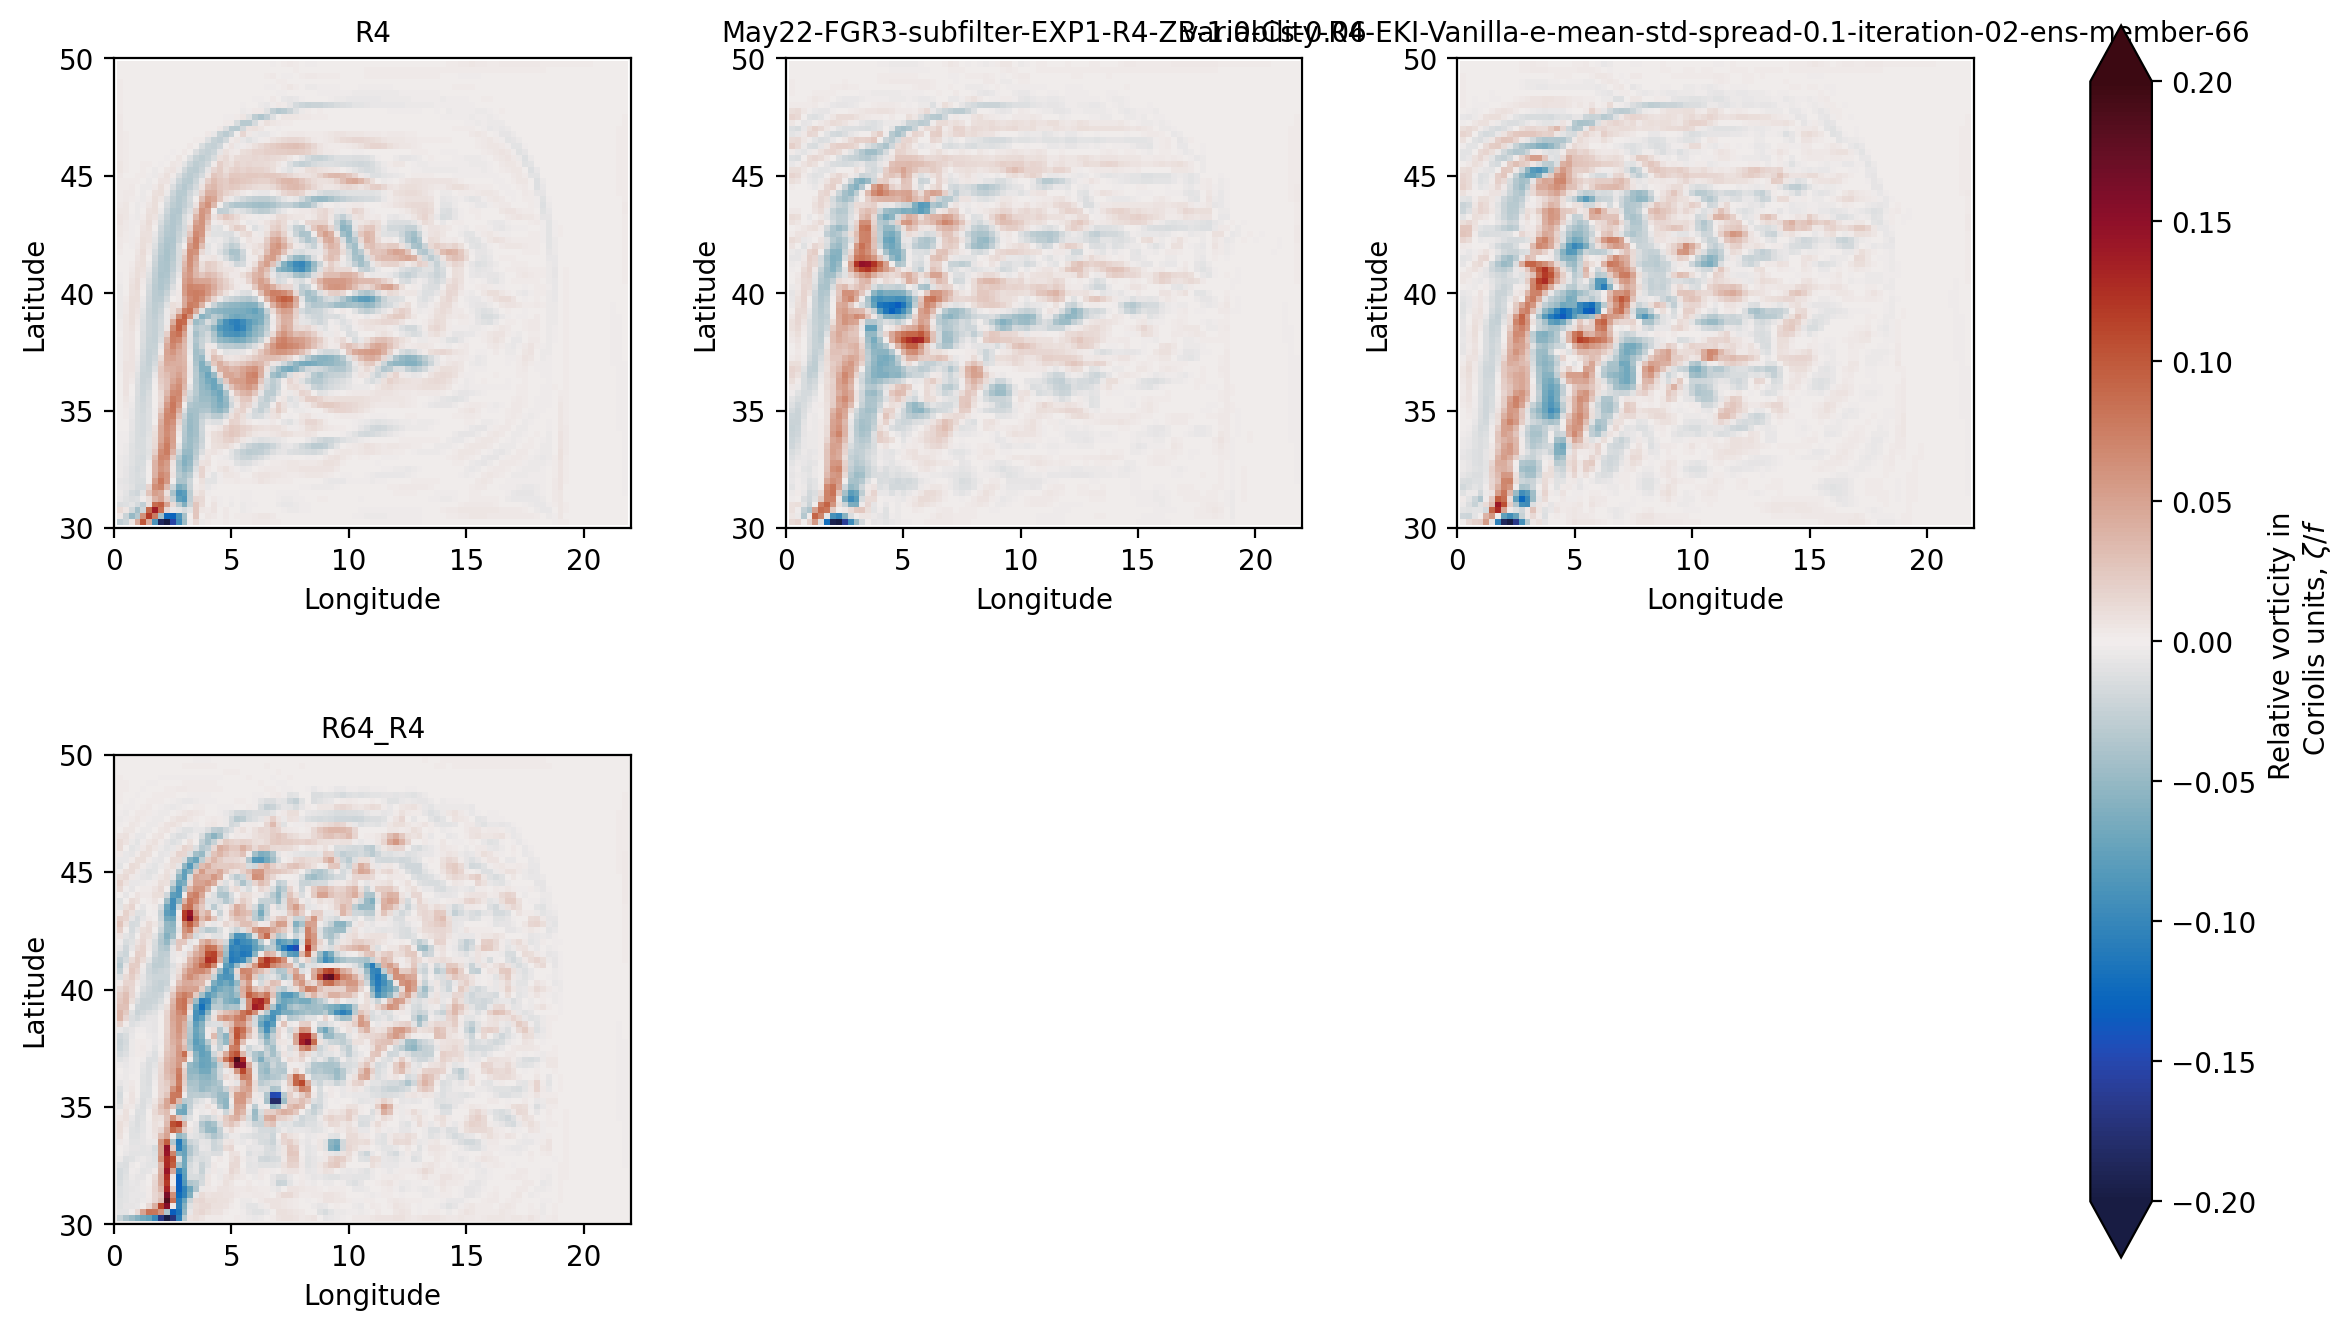

In [315]:
ds.plot_RV(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-02-ens-member-66', 'R64_R4'])

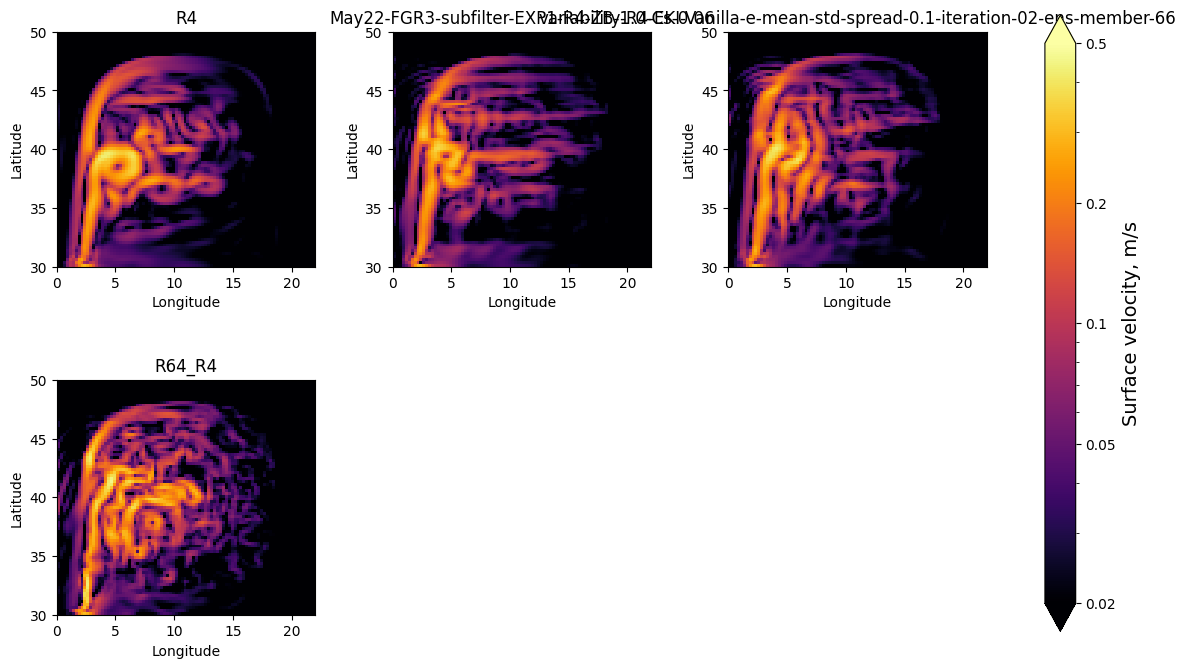

In [316]:
ds.plot_velocity_snapshot(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-02-ens-member-66', 'R64_R4'])

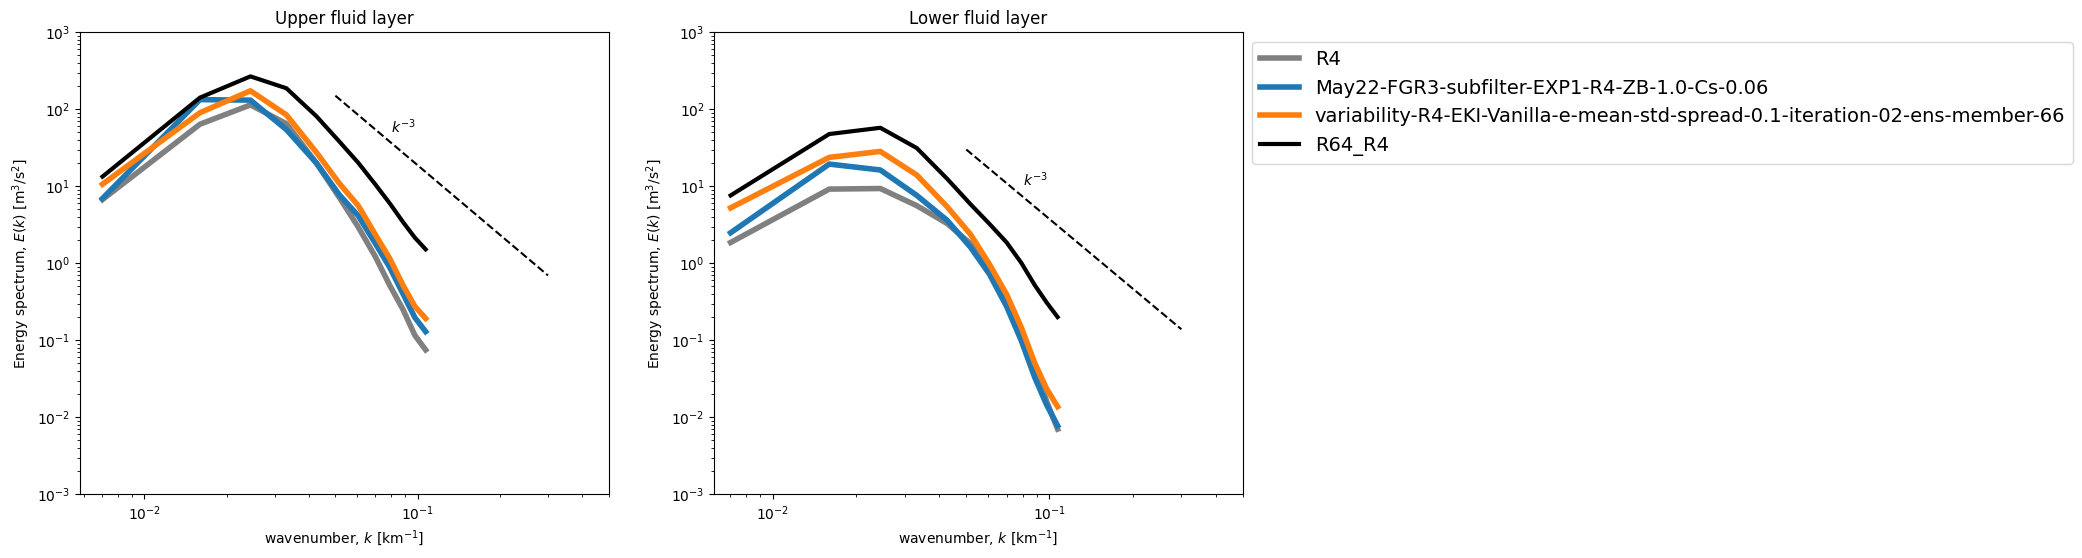

In [317]:
ds.plot_KE_spectrum(['R4', 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06', 'variability-R4-EKI-Vanilla-e-mean-std-spread-0.1-iteration-02-ens-member-66', 'R64_R4'])

In [320]:
metrics = xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/calibration/variability-R4/EKI-Vanilla-e-mean-std-spread-0.1/metrics.nc')

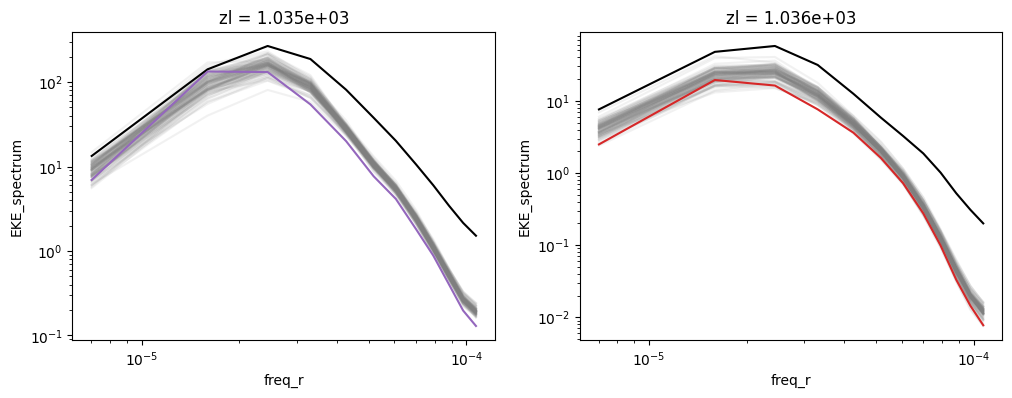

In [344]:
plt.figure(figsize=(12,4))
iter = 3

plt.subplot(1,2,1)
for ens in range(100):
    metrics.EKE_spectrum.isel(ens=ens).isel(iter=iter).isel(zl=0).plot(color='tab:gray', alpha=0.1)
ds['R64_R4'].EKE_spectrum[0].plot(color='k')
ds['May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06'].EKE_spectrum[0].plot(color='tab:purple')
#ds['R4'].EKE_spectrum[0].plot(color='tab:gray', lw=2)

plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
for ens in range(100):
    metrics.EKE_spectrum.isel(ens=ens).isel(iter=iter).isel(zl=1).plot(color='tab:gray', alpha=0.1)
ds['R64_R4'].EKE_spectrum[1].plot(color='k')
ds['May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06'].EKE_spectrum[1].plot(color='tab:red')
#ds['R4'].EKE_spectrum[1].plot(color='tab:purple', lw=2)

plt.yscale('log')
plt.xscale('log')

In [ ]:
def plot(idx=0):
    iteration = idx // 60 - 1
    if iteration == -1:
        exp = 'May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06'
    else:
        subset = loss.isel(iter=slice(0,iteration+1))
        i, e = np.unravel_index(subset.argmin(), subset.shape)
        print(i,e)
        exp = f'variability-R2-EKI-Vanilla-e-mean-std-spread-0.1-iteration-{i:02d}-ens-member-{e:02d}'
        
    if iteration==-1:
        label = 'offline ANN'
    elif iteration==0:
        label = 'random ANN (iteration=0)'
    elif iteration>0:
        label = f'optimized ANN (iteration={iteration})'

    ds.plot_velocity_snapshot(['R2', exp, 'R64_R2'], idx=idx%60 + 60,
                  labels = ['Unparameterized', label, 'Hires coarsegrained'])
    

# Check weights

In [2]:
metrics_R4 = xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/calibration/variability-R4/EKI-Vanilla-e-mean-std-spread-0.1/metrics.nc')
metrics_R2 = xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/calibration/variability-R2/EKI-Vanilla-e-mean-std-spread-0.1/metrics.nc')

hires_R4 = xr.open_dataset('../scripts/R64_R4/full.nc')
hires_R2 = xr.open_dataset('../scripts/R64_R2/full.nc')

ANN_netcdf_default = xr.open_dataset('/scratch/pp2681/mom6/CM26_ML_models/ocean3d/subfilter/FGR3/EXP1/model/Tall.nc').drop_vars(['x_test', 'y_test'])
ENS_SPREAD=0.1

# Initial ensemble for EKI
A1_mean = ANN_netcdf_default['A1'].values.reshape(-1)
b1_mean = ANN_netcdf_default['b1'].values.reshape(-1)
A1_std = ENS_SPREAD * ANN_netcdf_default['A1'].values.std()
b1_std = ENS_SPREAD * ANN_netcdf_default['b1'].values.std()

In [3]:
param_default = xr.DataArray(np.concatenate([A1_mean, b1_mean]), dims=['pdim'])
std_default = xr.DataArray(np.concatenate([A1_std * np.ones(len(A1_mean)), b1_std * np.ones(len(b1_mean))]), dims=['pdim'])

In [4]:
np.sqrt((((metrics_R4.param - param_default) / std_default)**2).mean('pdim').mean('ens'))

<xarray.DataArray (iter: 4)> Size: 32B
array([0.98701927, 1.58036537, 1.99842236, 1.99139873])
Dimensions without coordinates: iter

In [5]:
np.sqrt((((metrics_R2.param - param_default) / std_default)**2).mean('pdim').mean('ens'))

<xarray.DataArray (iter: 10)> Size: 80B
array([0.98701927, 2.99245287, 3.39095291, 3.72222932, 3.83824714,
       3.82853564, 3.82260655, 3.82742443, 3.83347212, 3.83118307])
Dimensions without coordinates: iter

In [6]:
(metrics_R4.param.std('ens') / std_default).mean('pdim')

<xarray.DataArray (iter: 4)> Size: 32B
array([0.98126578, 0.51789277, 0.15341147, 0.08356971])
Dimensions without coordinates: iter

In [7]:
(metrics_R2.param.std('ens') / std_default).mean('pdim')

<xarray.DataArray (iter: 10)> Size: 80B
array([0.98126578, 0.58043769, 0.3712828 , 0.24030012, 0.11088497,
       0.05442558, 0.02619986, 0.01270801, 0.00629451, 0.00316392])
Dimensions without coordinates: iter

# In R2 calibration experiment, the last ensemble is effectively collapsed and all experiments can be considered identical

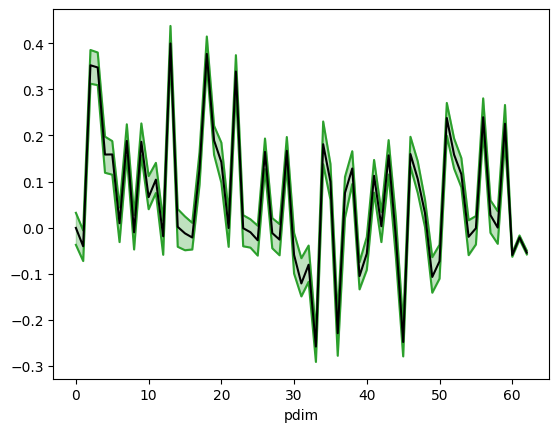

In [200]:
da = metrics_R2.param.isel(iter=0)

param_min = da.min('ens')
param_max = da.max('ens')

# Plot bounds
param_min.plot(color='tab:green', alpha=1.0)
param_max.plot(color='tab:green', alpha=1.0)

# Fill between
plt.fill_between(
    param_min[param_min.dims[0]],  # x-axis (first dimension of DataArray)
    param_min.values,
    param_max.values,
    color='tab:green',
    alpha=0.3
)

# Plot default
param_default.plot(color='k')

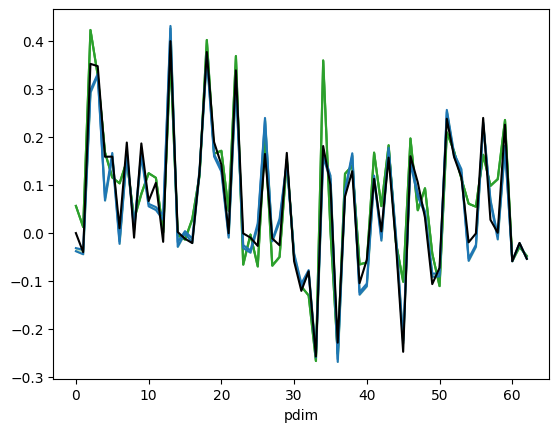

In [201]:
for metrics, color in zip([metrics_R2, metrics_R4], ['tab:green', 'tab:blue']):
    da = metrics.param.isel(iter=-1)
    
    param_min = da.min('ens')
    param_max = da.max('ens')
    
    # Plot bounds
    param_min.plot(color=color, alpha=1.0)
    param_max.plot(color=color, alpha=1.0)
    
    # Fill between
    plt.fill_between(
        param_min[param_min.dims[0]],  # x-axis (first dimension of DataArray)
        param_min.values,
        param_max.values,
        color='tab:green',
        alpha=0.3
    )

# Plot default
param_default.plot(color='k')

Text(0.5, 1.0, 'mean value = 0.00037')

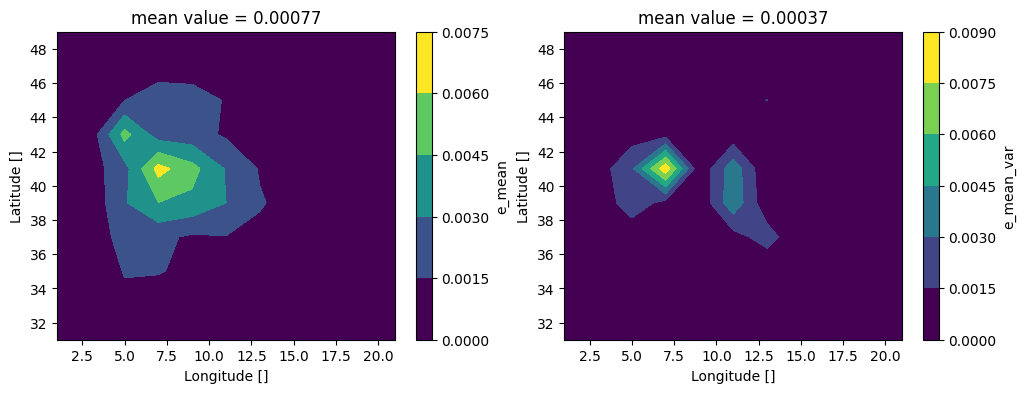

In [208]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R2.e_mean.var('ens').isel(iter=-1)[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R2.e_mean_var[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

In [286]:
0.00077/0.00037

2.081081081081081

Text(0.5, 1.0, 'mean value = 3.05132')

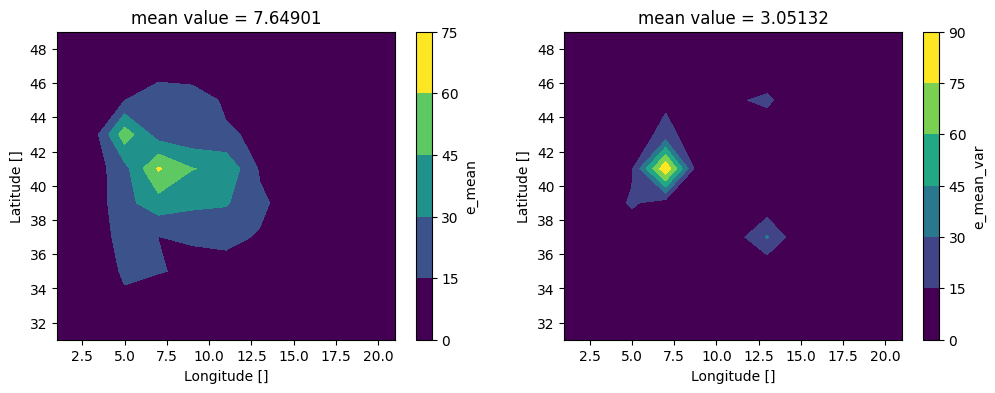

In [209]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R2.e_mean.var('ens').isel(iter=-1)[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R2.e_mean_var[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

In [287]:
7.64/3.05

2.504918032786885

Text(0.5, 1.0, 'mean value = 0.00014')

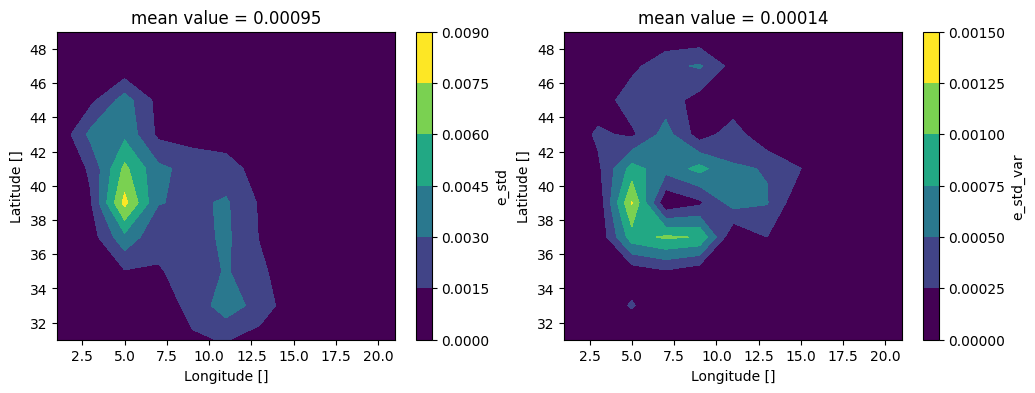

In [282]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R2.e_std.var('ens').isel(iter=-1)[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R2.e_std_var[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

In [285]:
0.00095/0.00014

6.7857142857142865

Text(0.5, 1.0, 'mean value = 0.86870')

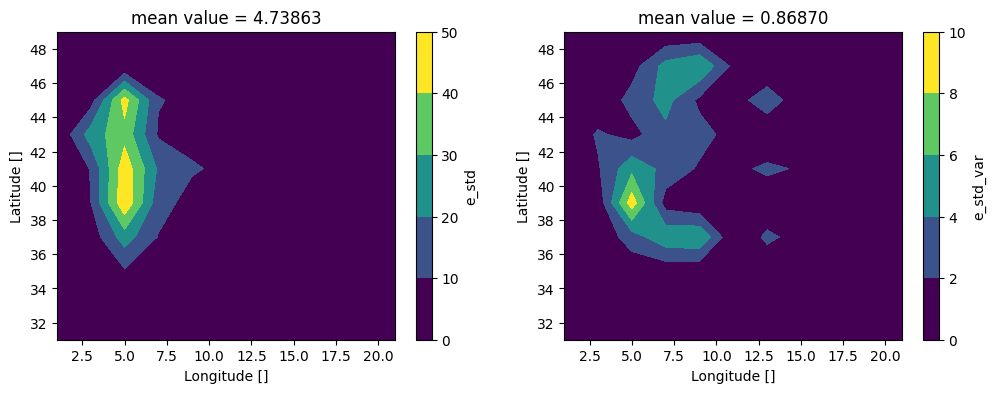

In [283]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R2.e_std.var('ens').isel(iter=-1)[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R2.e_std_var[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

In [288]:
4.73/0.86

5.500000000000001

Text(0.5, 1.0, 'mean value = 0.88635')

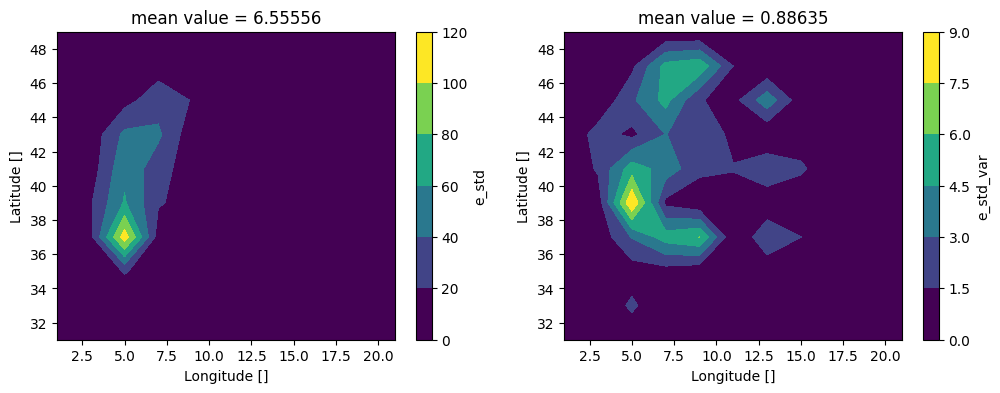

In [289]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R4.e_std.var('ens').isel(iter=-1)[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R4.e_std_var[1]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

Text(0.5, 1.0, 'mean value = 0.00014')

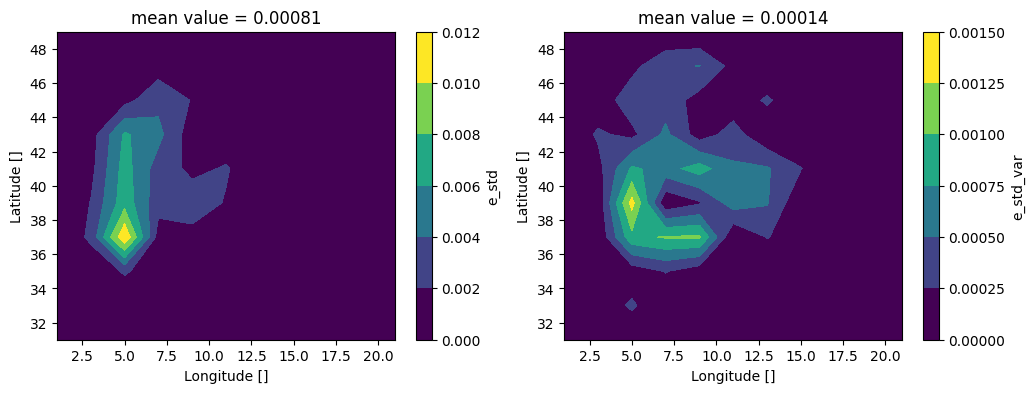

In [290]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Actual obs noise variance')
field = metrics_R4.e_std.var('ens').isel(iter=-1)[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

plt.subplot(1,2,2)
plt.title('Assumed obs noise variance')
field = hires_R4.e_std_var[0]
field.plot.contourf()
plt.title('mean value = %.5f' % field.mean())

# To sum up:
* Obs error of mean interface position is likely underestimated 2-2.5 times.
* Obs error of standard deviation is likely underestimated 5.5-6.5 times
* So, we expect that in the worst-case scenario, the weighted averaged MSE should be on the order of (6.5+2.5)/2=4.5 

In [48]:
g_ens =  np.vstack([np.array(metrics_R4['e_mean'].isel(iter=-1)).reshape([100, -1]).astype('float64').T,
                    np.array(metrics_R4['e_std'].isel(iter=-1)).reshape([100, -1]).astype('float64').T])

mean=lambda x: x.mean(axis=-1,keepdims=True)
cov_yy_R4 = (g_ens-mean(g_ens))   @ (g_ens-mean(g_ens)).T / 100

In [49]:
g_ens =  np.vstack([np.array(metrics_R2['e_mean'].isel(iter=-2)).reshape([100, -1]).astype('float64').T,
                    np.array(metrics_R2['e_std'].isel(iter=-2)).reshape([100, -1]).astype('float64').T])

mean=lambda x: x.mean(axis=-1,keepdims=True)
cov_yy_R2 = (g_ens-mean(g_ens))   @ (g_ens-mean(g_ens)).T / 100

In [57]:
g_ens =  np.vstack([np.array(metrics_R2['e_mean'].isel(iter=0)).reshape([100, -1]).astype('float64').T,
                    np.array(metrics_R2['e_std'].isel(iter=0)).reshape([100, -1]).astype('float64').T])

mean=lambda x: x.mean(axis=-1,keepdims=True)
cov_yy_R2_init = (g_ens-mean(g_ens))   @ (g_ens-mean(g_ens)).T / 100

Text(0.5, 1.0, 'Error covariance $1/4^\\circ$')

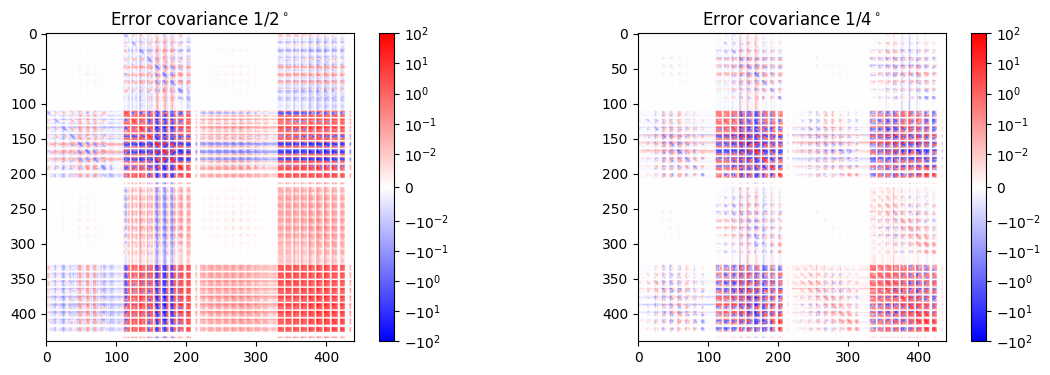

In [50]:
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.imshow(cov_yy_R2, norm=SymLogNorm(linthresh=1e-2, vmin=-1e+2, vmax=1e+2), cmap='bwr')
plt.colorbar()
plt.title('Error covariance $1/2^\circ$')

plt.subplot(1,2,2)
plt.imshow(cov_yy_R4, norm=SymLogNorm(linthresh=1e-2, vmin=-1e+2, vmax=1e+2), cmap='bwr')
plt.colorbar()
plt.title('Error covariance $1/4^\circ$')

# Constructing a loss function which is based on the principal components of collapsed perturbed parameter ensemble
During any iteration of the EKI, we have a typically similar covariance structure of forward model errors. However, part of it comes from difference in parameters, and part from difference in realization of the chaotic system. Here we take the last iteration of EKI where ensemble almost collapsed and use its leading PCAs to create a new loss function which better accoounts for the noise model. 

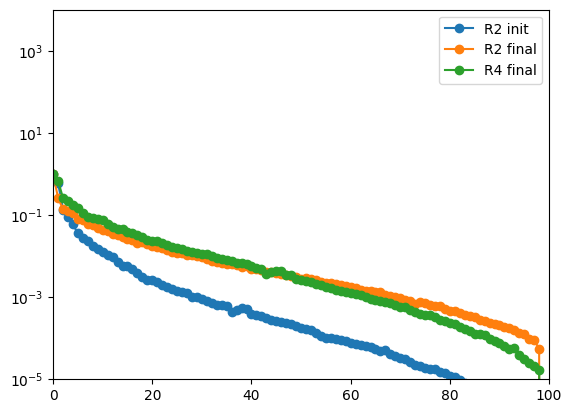

In [80]:
e = np.linalg.eig(cov_yy_R2_init).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R2 init')
e = np.linalg.eig(cov_yy_R2).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R2 final')
e = np.linalg.eig(cov_yy_R4).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R4 final')
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([1e-5,1e+4])
plt.legend()

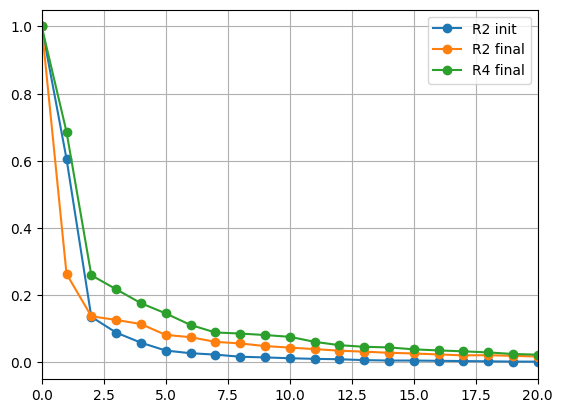

In [81]:
e = np.linalg.eig(cov_yy_R2_init).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R2 init')
e = np.linalg.eig(cov_yy_R2).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R2 final')
e = np.linalg.eig(cov_yy_R4).eigenvalues
plt.plot(e/np.max(e), marker='o', label='R4 final')
plt.xlim([0,20])
plt.legend()
plt.grid()

(0.0, 1.0)

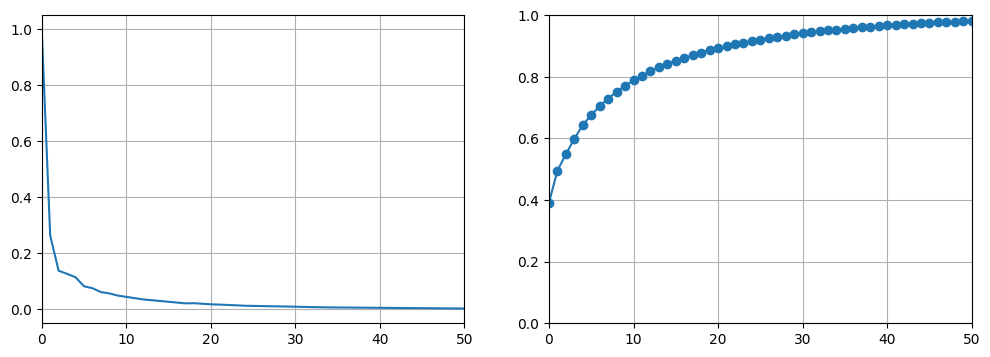

In [149]:
e = np.linalg.eig(cov_yy_R2).eigenvalues
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(e/np.max(e))
plt.xlim([0,50])
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.cumsum(e)/np.sum(e), marker='o')
plt.xlim([0,50])
plt.grid()
plt.ylim([0,1])

In [157]:
# We choose to target 80% of total model error
eigs = np.linalg.eig(cov_yy_R4)
U = eigs.eigenvectors[:,0:10]
Lambda = np.diag(eigs.eigenvalues[0:10])
np.abs(np.imag(U)).sum()
U = np.real(U)
Lambda = np.real(Lambda)

In [158]:
np.linalg.norm(cov_yy_R4 @ U - U@Lambda)

1.0024154453351607e-12

Text(0.5, 0.98, '1st PCA mode')

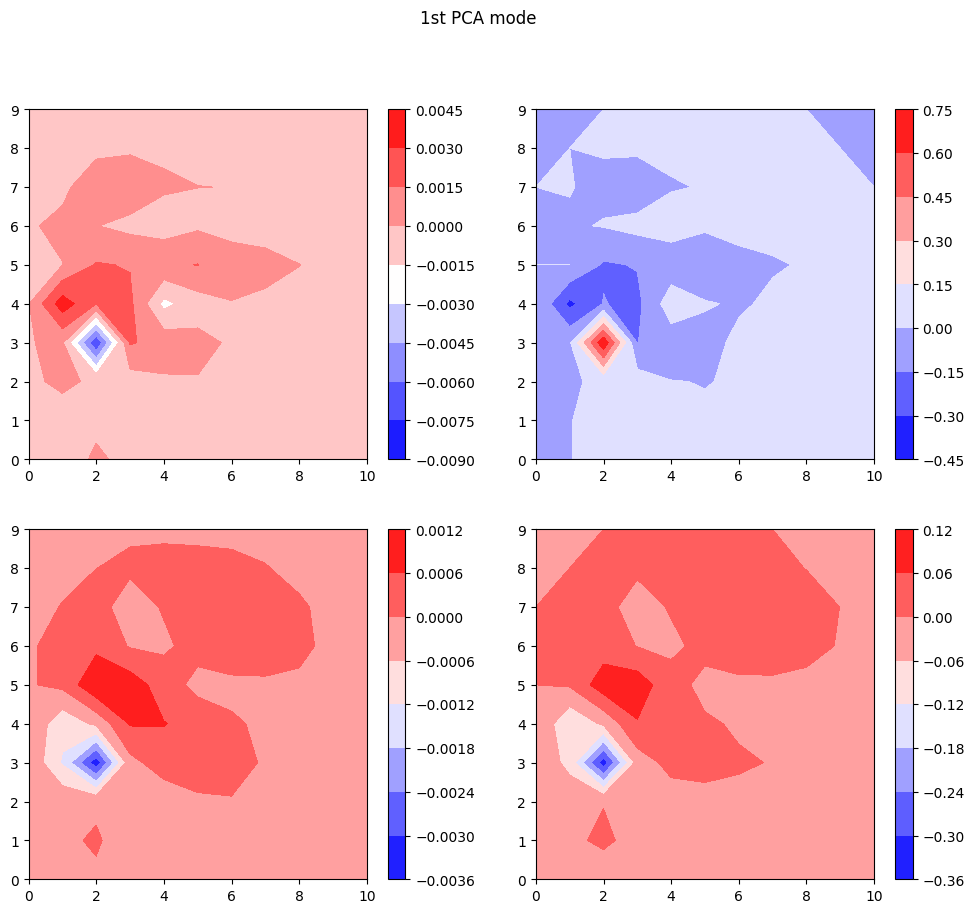

In [159]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.contourf(U[:,0][:110].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,2)
plt.contourf(U[:,0][110:220].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,3)
plt.contourf(U[:,0][220:330].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,4)
plt.contourf(U[:,0][330:440].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.suptitle('1st PCA mode')

Text(0.5, 0.98, '2nd PCA mode')

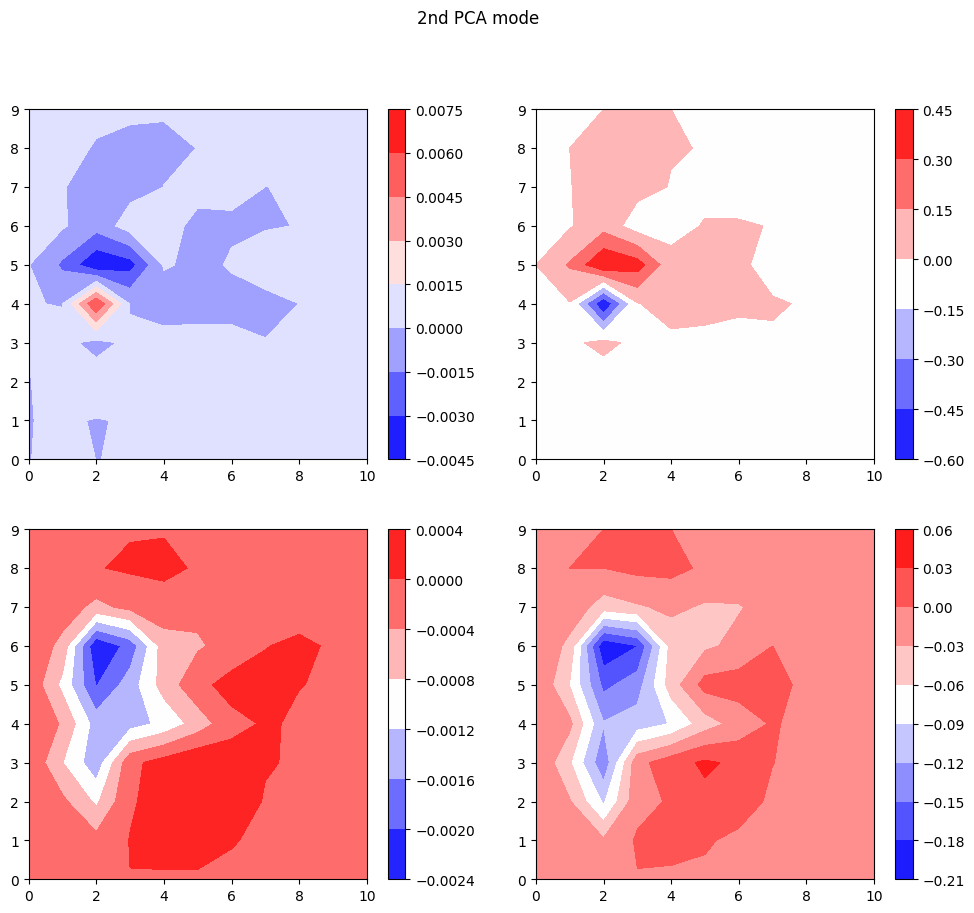

In [160]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.contourf(U[:,1][:110].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,2)
plt.contourf(U[:,1][110:220].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,3)
plt.contourf(U[:,1][220:330].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,4)
plt.contourf(U[:,1][330:440].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.suptitle('2nd PCA mode')

Text(0.5, 0.98, '3rd PCA mode')

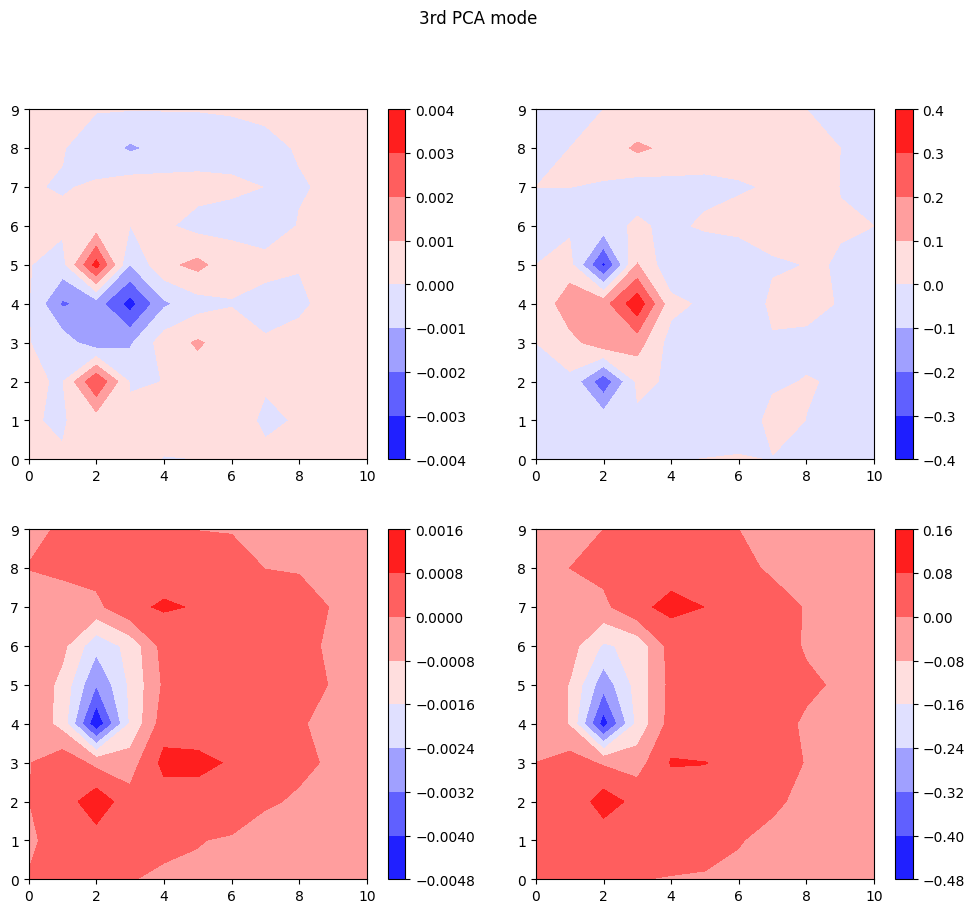

In [161]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.contourf(U[:,2][:110].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,2)
plt.contourf(U[:,2][110:220].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,3)
plt.contourf(U[:,2][220:330].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.subplot(2,2,4)
plt.contourf(U[:,2][330:440].reshape([10,11]), cmap='bwr')
plt.colorbar()

plt.suptitle('3rd PCA mode')